# Классический QR-алгоритм

В этом упражнении вам необходимо написать функцию qr_iteration, которая будет выполнять один шаг QR-итерации.

Входные данные:
- $A_k$: матрица, которую нужно привести к треугольной форме

Выходные данные:
- $A_{k+1}$: матрица, к которой применена одна итерация QR-алгоритма

```python
def qr_iteration(A):
    """Perform one step towards Schur form using QR iteration"""
    return A
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from tqdm.auto import tqdm
from PIL import Image
import requests
from io import BytesIO

# ----------------------------
# Parameters and Setup
# ----------------------------
N_FRAMES = 120  # total number of frames
HOLD_FRAMES = 10  # frames to hold original images
FPS = 20
FILENAME = "matrix_animation.mp4"
DPI = 200
MATRIX_SIZE = 128  # size of the matrices

# Style parameters
LABELS_FONTSIZE = 10
FIGSIZE = (8, 4)  # Adjusted for 2 images instead of 3

def load_image_as_matrix(url, size=(MATRIX_SIZE, MATRIX_SIZE)):
    """Load and preprocess image from URL into a matrix"""
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
    img = img.resize(size)
    return np.array(img)

# Load two images
url0 = "https://raw.githubusercontent.com/MerkulovDaniil/optim/refs/heads/master/assets/Notebooks/fmin_hopfield_1.webp"
url1 = 'https://raw.githubusercontent.com/MerkulovDaniil/optim/refs/heads/master/assets/Notebooks/fmin_hopfield_0.webp'


# Generate matrices from images
A1 = load_image_as_matrix(url0)
A2 = load_image_as_matrix(url1)

# Store initial matrices for reference
A1_init = A1.copy()
A2_init = A2.copy()

def qr_iteration(A):
    """Perform one step towards Schur form using QR iteration"""
    Q, R = np.linalg.qr(A)
    return R @ Q

# ----------------------------
# Set up the plot
# ----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIGSIZE, layout='tight')

# Initial heatmaps
im1 = ax1.imshow(A1, cmap='gray')
im2 = ax2.imshow(A2, cmap='gray')

# Set titles
ax1.set_title('Рус', fontsize=LABELS_FONTSIZE)
ax2.set_title('Ящер', fontsize=LABELS_FONTSIZE)
plt.tight_layout()

# Remove ticks
for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])

# Animation update function
def update(frame):
    global A1, A2
    
    # Hold original images for HOLD_FRAMES frames
    if frame < HOLD_FRAMES:
        return im1, im2
    
    # After hold period, perform Schur iterations
    A1 = qr_iteration(A1)
    A2 = qr_iteration(A2)
    
    im1.set_array(A1)
    im2.set_array(A2)
    return im1, im2

# ----------------------------
# Create and save the animation
# ----------------------------
print("Generating animation...")
ani = FuncAnimation(fig, update, frames=N_FRAMES, interval=100, blit=True)

# Optimize video writing
writer = animation.FFMpegWriter(
    fps=FPS,
    metadata=dict(artist='Matrix Animation'),
    bitrate=-1,
    codec='h264',
    extra_args=['-preset', 'ultrafast', '-crf', '28', '-pix_fmt', 'yuv420p', '-tune', 'animation']
)

with tqdm(total=100, desc="Saving animation") as pbar:
    plt.tight_layout()
    ani.save(FILENAME, writer=writer, dpi=DPI,
             progress_callback=lambda i, n: pbar.update(100/n))

plt.close()

Generating animation...


Saving animation:   0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_55670/3608339251.py:100: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


# QR алгоритм + форма Гессенберга

В этом упражнении мы сравним классический QR-алгоритм и QR-алгоритм с использованием формы Гессенберга. Вам необходимо реализовать две функции: naive_qr_iterations и hessenberg_qr_iterations.

```python
def naive_qr_iterations(A, iterations):
    """Performs a fixed number of naive QR iterations."""
    A_k = A.copy()
    for _ in range(iterations):
        
    return A_k # Return the result to ensure computation isn't optimized away

def hessenberg_qr_iterations(A, iterations):
    """Performs Hessenberg reduction and then a fixed number of QR iterations."""
    # 1. Reduce to Upper Hessenberg form
    H = 

    # 2. Perform QR iterations on the Hessenberg matrix
    H_k = H.copy()
    for _ in range(iterations):
        
    return H_k # Return the result
```

Starting timing comparison for n = [ 3  9 15 21 27 34 40 46 52 58 65 71 77 83 90]
Using 10 QR iterations.
Timeit settings: number=9, repeat=9


Matrix Sizes: 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]



Timing complete.
Naive Times: [0.0001225694444049926, 0.00011121300000619765, 0.00013676855562355032, 0.00017768055557907146, 0.00020818988893248994, 0.00029009255558776204, 0.0003725463332860575, 0.0004923055555789486, 0.0006390741111519876, 0.0008034213333303342, 0.0016623888888918576, 0.0020328148888842813, 0.0023104953334041056, 0.003200666666594366, 0.0034901897778480714]
Hessenberg Times: [0.0001085277778353581, 0.00012573611113313946, 0.00014839344445742123, 0.00016394899992317532, 0.0002040741111260205, 0.00025551388888642477, 0.00031028244443910406, 0.00039233333336596843, 0.0004637870000199958, 0.0005670601110776059, 0.0011991250000088864, 0.0013367638889071208, 0.0017542175555718131, 0.001469842555606091, 0.00201773144443804]


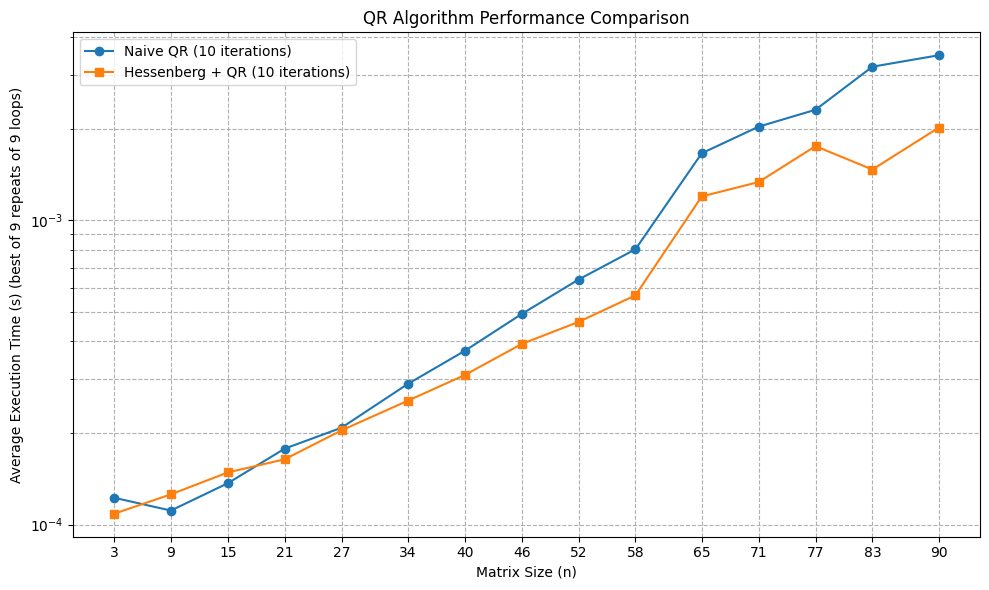

In [51]:
import numpy as np
import scipy.linalg
import timeit
import matplotlib.pyplot as plt
from tqdm import tqdm  # Optional: for progress bar

# --- Configuration ---
# Matrix sizes to test
n_values = np.linspace(3, 90, 15, dtype=int)
# Number of QR iterations to perform within the timed function
# Note: This is *not* for full convergence, but to represent the iterative part.
# The main benefit of Hessenberg is reducing the cost *per iteration*.
NUM_ITERATIONS = 10
# timeit parameters (mimicking -n 5 -r 5)
TIMEIT_NUMBER = 9  # Number of executions within one repeat loop
TIMEIT_REPEAT = 9  # Number of times to repeat the timing loop

# --- Algorithm Implementations ---

def naive_qr_iterations(A, iterations):
    """Performs a fixed number of naive QR iterations."""
    A_k = A.copy()
    for _ in range(iterations):
        Q, R = np.linalg.qr(A_k)
        A_k = R @ Q # Note: RQ instead of QR for eigenvalue algorithm
    return A_k # Return the result to ensure computation isn't optimized away

def hessenberg_qr_iterations(A, iterations):
    """Performs Hessenberg reduction and then a fixed number of QR iterations."""
    # 1. Reduce to Upper Hessenberg form
    H = scipy.linalg.hessenberg(A, calc_q=False) # We only need H for iterations

    # 2. Perform QR iterations on the Hessenberg matrix
    H_k = H.copy()
    for _ in range(iterations):
        Q, R = np.linalg.qr(H_k)
        H_k = R @ Q # Note: RQ instead of QR for eigenvalue algorithm
    return H_k # Return the result

# --- Timing Loop ---
naive_times = []
hessenberg_times = []

print(f"Starting timing comparison for n = {n_values}")
print(f"Using {NUM_ITERATIONS} QR iterations.")
print(f"Timeit settings: number={TIMEIT_NUMBER}, repeat={TIMEIT_REPEAT}")

for n in tqdm(n_values, desc="Matrix Sizes"):
    # Create a random matrix for this size
    matrix = np.random.rand(n, n)

    # --- Time Naive QR ---
    setup_code = f"""
import numpy as np
from __main__ import naive_qr_iterations, matrix, NUM_ITERATIONS
# Ensure matrix is defined in the setup scope for timeit
matrix_copy = matrix.copy()
    """
    stmt_code = "naive_qr_iterations(matrix_copy, NUM_ITERATIONS)"

    # timeit.repeat runs the setup once per repeat, then the statement 'number' times.
    # It returns a list of total times for each repeat loop.
    results_naive = timeit.repeat(
        stmt=stmt_code,
        setup=setup_code,
        number=TIMEIT_NUMBER,
        repeat=TIMEIT_REPEAT
    )
    # Get the best time and average it over the number of executions per loop
    # This mimics the typical output of %timeit (best of 'r' repeats)
    best_time_naive = min(results_naive) / TIMEIT_NUMBER
    naive_times.append(best_time_naive)

    # --- Time Hessenberg + QR ---
    setup_code_hess = f"""
import numpy as np
import scipy.linalg
from __main__ import hessenberg_qr_iterations, matrix, NUM_ITERATIONS
# Ensure matrix is defined in the setup scope for timeit
matrix_copy = matrix.copy()
    """
    stmt_code_hess = "hessenberg_qr_iterations(matrix_copy, NUM_ITERATIONS)"

    results_hess = timeit.repeat(
        stmt=stmt_code_hess,
        setup=setup_code_hess,
        number=TIMEIT_NUMBER,
        repeat=TIMEIT_REPEAT
    )
    # Get the best time and average it
    best_time_hess = min(results_hess) / TIMEIT_NUMBER
    hessenberg_times.append(best_time_hess)

    # Optional: print intermediate results
    # print(f"n={n}: Naive Time = {best_time_naive:.6f}s, Hessenberg Time = {best_time_hess:.6f}s")

print("\nTiming complete.")
print("Naive Times:", naive_times)
print("Hessenberg Times:", hessenberg_times)

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
plt.plot(n_values, naive_times, 'o-', label=f'Naive QR ({NUM_ITERATIONS} iterations)')
plt.plot(n_values, hessenberg_times, 's-', label=f'Hessenberg + QR ({NUM_ITERATIONS} iterations)')


plt.xlabel("Matrix Size (n)")
plt.ylabel(f"Average Execution Time (s) (best of {TIMEIT_REPEAT} repeats of {TIMEIT_NUMBER} loops)")
plt.title("QR Algorithm Performance Comparison")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.yscale('log') # Use log scale for time as it grows quickly
plt.xticks(n_values) # Ensure ticks are at the tested n values

plt.tight_layout()
plt.show()

Попробуйте увеличить размерность матрицы до 95 и посмотрите на результат. Объясните полученный эффект.